## Example 1 - Welded boxes

We have a company producing welded boxes. Sheet metal manufacturer supplies us with metal sheets with a width *a* and a height *b*. Our task is to find out how to cut pieces of metal at the corners to maximize the volume of the box. The box has no lid, it has only bottom and four sides (see following picture).

![Metal sheet](./data/boxes.svg)

Hence volume of our box will be:
$$V(x) = x (a-2x) (b-2x) = abx - 2ax^2 - 2bx^2 + 4x^3$$
Note, that $x$ becomes the height of the box after folding the metal sheet.<br>
And thus our task will be (we assume that $a \leq b$)
$$\underset{x}{\arg\max} \ V(x), \ subject \ to: \ x\in(0,\frac{1}{2}a)$$
That is only mathematicaly written, that we need to find such a parameter $x$ that our volume $V(x)$ is maximized. Our $x$ has to be from  interval $(0,\frac{1}{2}a)$.

Maybe it seems difficult, but it is actually very easy problem and you need only simple mathematics to solve it.
Lets plot a volume function depending on *x* for the selected *a* and *b*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

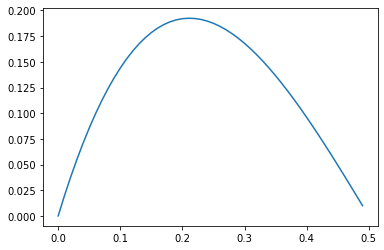

In [2]:
wea, b = 1., 2.
x = np.arange(0., a/2, 0.01)
v = x * (a - 2*x) * (b - 2*x)we
plt.plot(x, v)

The optimal solution is at the point where the volume is the greatest. From a mathematical point of view, we have to check only two types of points:

1. Start and end of interval ($x=0, x=\frac{1}{2}a$)
2. Local extrema - points where $\frac{dV(x)}{dx} = 0$ (and are in our interval of course)

The derivative of our volume function is:
$$\frac{dV(x)}{dx} =  ab-4ax-4bx+12x^2 = \\ = 12x^2 + (-4a-4b)x + ab$$

Let's find local extremes by finding $x$, where $\frac{dV(x)}{dx}=0$.

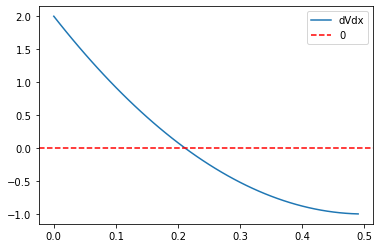

In [3]:
dv = a*b - 4*a*x - 4*b*x + 12*x*x
plt.plot(x, dv, label="dVdx")
plt.axhline(0.0, label="0", color="r", linestyle='dashed')
plt.legend()

This example is so easy, that we can solve it analytically. It is a polynomial of second degree.

In [4]:
# coefficients of a polynomial
poly_a = 12.
poly_b = -4*a - 4*b
poly_c = a*b
diskriminant = poly_b**2 - 4*poly_a*poly_c
x1 = (-poly_b + np.sqrt(diskriminant))/2./poly_a 
x2 = (-poly_b - np.sqrt(diskriminant))/2./poly_a
print(f"roots are {x1:2f} and {x2:2f}")

roots are 0.788675 and 0.211325


We have to check both roots, if they are in our interval $(0, \frac{1}{2}a)$, in our case one is and one is not:

In [5]:
solution = x1 if x1 >= 0 and x1 <= a/2 else x2
solution

0.21132486540518713

Plot it to a graph (volume function is 20 times bigger just for plotting purposes):

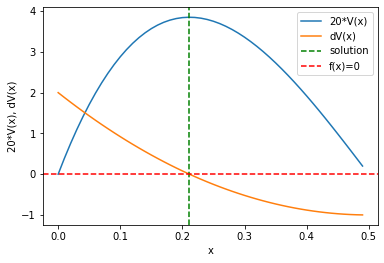

In [6]:
: plt.figure()
plt.plot(x, 20*v, label="20*V(x)")
plt.plot(x, dv, label="dV(x)")
plt.axvline(solution, color="g", label="solution", linestyle='dashed')
plt.axhline(0, color="r", label="f(x)=0", linestyle='dashed')
plt.legend()
plt.xlabel("x")
plt.ylabel("20*V(x), dV(x)")
plt.show()

Try to think if it is possible for the discriminant to be negative? Has this approach some pitfalls?